<a href="https://colab.research.google.com/github/Beyza-N/claw-detection-and-classification/blob/main/claw_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline


current_directory = os.getcwd()
print("Çalışma Dizini:", current_directory)

Çalışma Dizini: /content


In [ ]:
!pip install split-folders

import splitfolders

splitfolders.ratio(r"/content/sample_data/", output="output", seed=42, ratio=(0.7, 0.15, 0.15))


Copying files: 1552 files [00:01, 1251.21 files/s]


In [ ]:

!ls


sample_data


In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 1084 files belonging to 5 classes.
Found 237 files belonging to 5 classes.
Found 231 files belonging to 5 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['.ipynb_checkpoints', 'CLAW_B_AMONİA_REDNESS', 'CLAW_B_PLUS_Amonia_akin_total', 'CLAW_B_PLUS_Redness', 'CLAW_C_SKİN']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

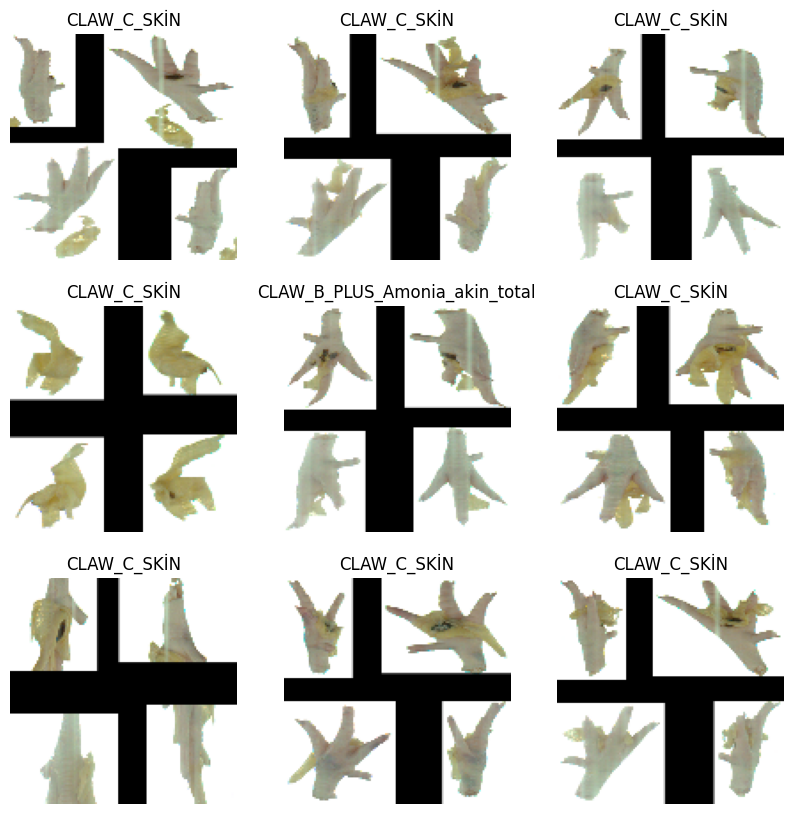

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

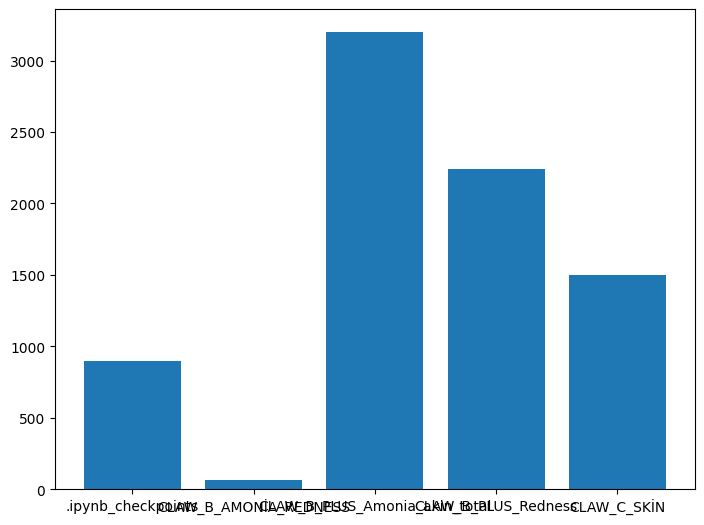

In [ ]:
class_names = [".ipynb_checkpoints", "CLAW_B_AMONİA_REDNESS", "CLAW_B_PLUS_Amonia_akin_total", "CLAW_B_PLUS_Redness", "CLAW_C_SKİN"]
size = [896, 64, 3200, 2240, 1500]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(class_names, size)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(5,"softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=20, batch_size=64, verbose=1)

Epoch 1/20
17/17 [==============================] - 65s 4s/step - loss: 2.2509 - accuracy: 0.7223 - val_loss: 0.7344 - val_accuracy: 0.8442
Epoch 2/20
17/17 [==============================] - 34s 2s/step - loss: 0.6256 - accuracy: 0.8395 - val_loss: 0.8062 - val_accuracy: 0.8442
Epoch 3/20
17/17 [==============================] - 34s 2s/step - loss: 0.5531 - accuracy: 0.8395 - val_loss: 0.7660 - val_accuracy: 0.8442
Epoch 4/20
17/17 [==============================] - 34s 2s/step - loss: 0.5103 - accuracy: 0.8395 - val_loss: 0.6751 - val_accuracy: 0.8442
Epoch 5/20
17/17 [==============================] - 34s 2s/step - loss: 0.4509 - accuracy: 0.8395 - val_loss: 0.5098 - val_accuracy: 0.8442
Epoch 6/20
17/17 [==============================] - 34s 2s/step - loss: 0.3777 - accuracy: 0.8524 - val_loss: 0.5539 - val_accuracy: 0.8571
Epoch 7/20
17/17 [==============================] - 34s 2s/step - loss: 0.3612 - accuracy: 0.8681 - val_loss: 0.4376 - val_accuracy: 0.8831
Epoch 8/20
17/17 [==

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

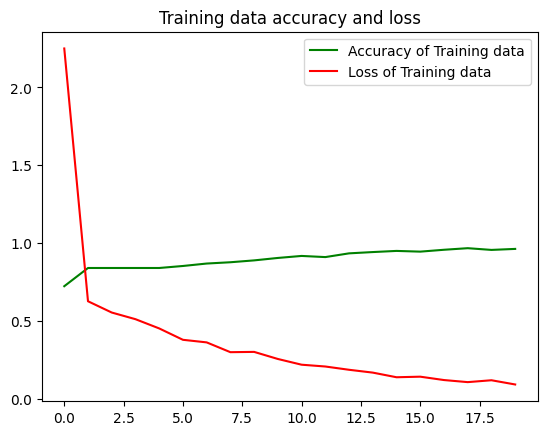

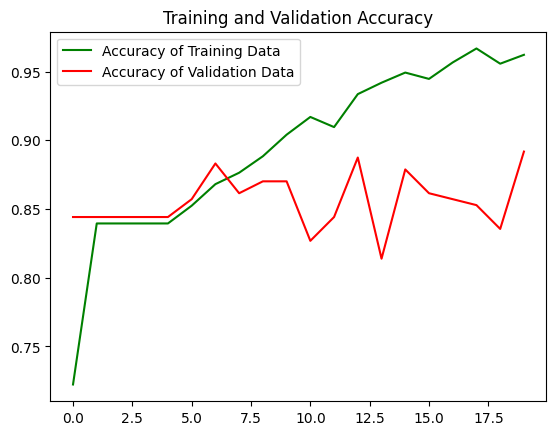

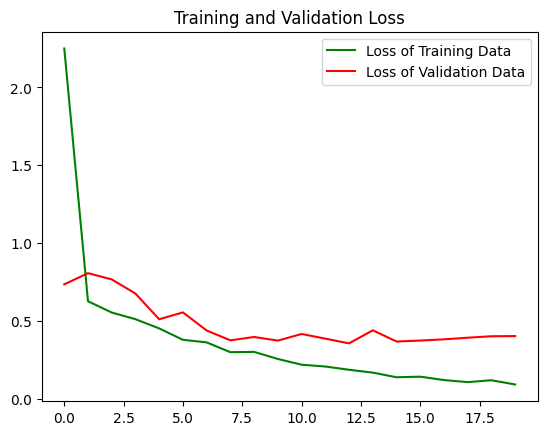

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)

4/4 [==============================] - 2s 389ms/step - loss: 0.4326 - accuracy: 0.8776


1/1 [==============================] - 0s 33ms/step


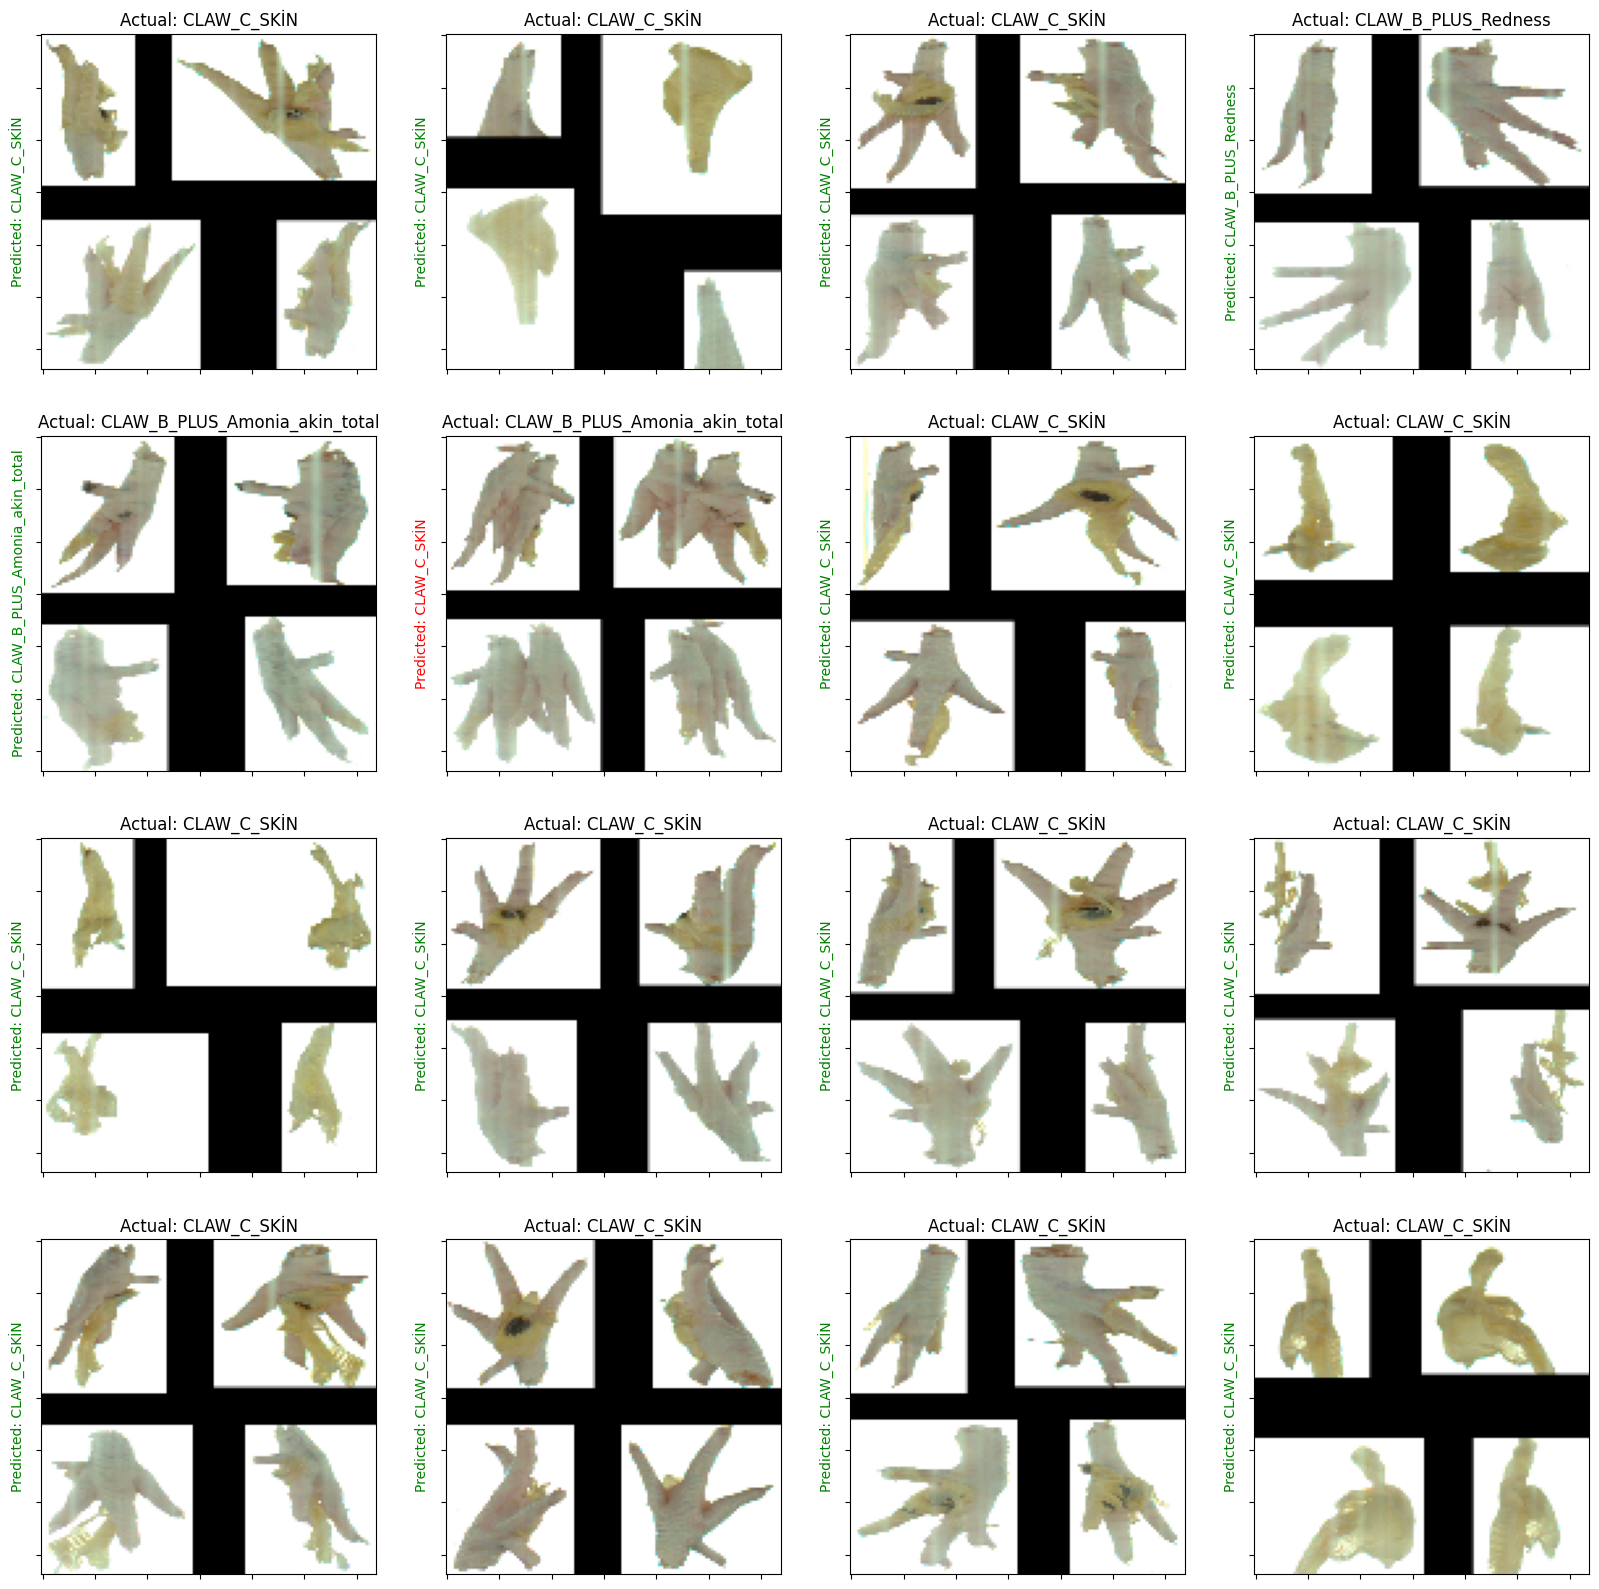

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])